In [2]:
from serial import Serial
from time import time
from numpy import array, std, set_printoptions
from struct import unpack

In [3]:
%precision 6
set_printoptions(suppress=True)

In [4]:
%matplotlib inline
from matplotlib.pyplot import figure, style
from matplotlib import rcParams

style.use("seaborn")
params = {'text.latex.preamble' : r"\usepackage{cmbright}",
          'text.usetex' : True,
          'font.family' : 'sans-serif',
          'font.sans-serif' : ['Noto Sans'],
          'font.size' : 20}
rcParams.update(params)

In [40]:
xs = [0]
ts = [0]

with Serial("/dev/cu.usbserial-A603QGMH", baudrate=2000000) as puerto_arduino:
    while ts[-1] < 5:
        try:
            lec = int.from_bytes(puerto_arduino.read(6), byteorder='little')
            xs.append(int(lec/(2**32)))
            ts.append(int(lec%(2**32))*0.000001)
            puerto_arduino.write(bytes([0, 0]))
        except KeyboardInterrupt:
            break


xs = array(xs[1:])
ts = array(ts[1:])

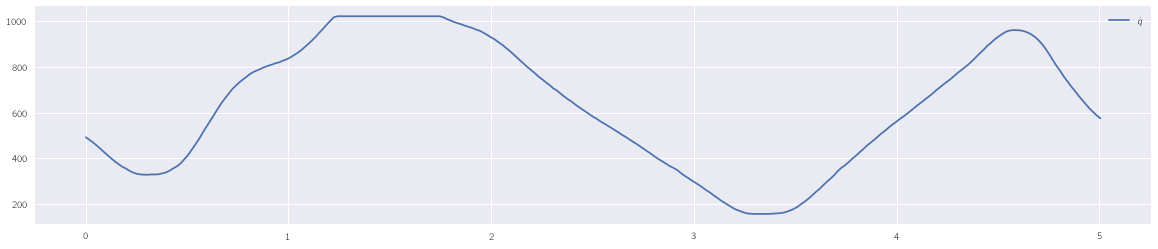

In [41]:
fig = figure(figsize=(20,4))
ax = fig.gca()
p1, = ax.plot(ts, xs);
ax.legend([p1], [r"$\dot{q}$"]);

In [47]:
periodos = ts[1:] - ts[:-1]

In [48]:
μ = sum(periodos)/len(periodos)
σ = std(periodos)

In [49]:
μ, σ

(0.018003539568345325, 1.3807133067896381e-05)